In [55]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

In [56]:
df = pd.read_csv("../Atmospheric Data Cleaned Instances Per Day.csv")

In [57]:
df.head()

,Year,Month,Day,O3,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WDir_Avg,Press_Avg,Rad_Avg,Rain_Tot
0,2023,5,1,42.098597,2.377042,0.378701,0.269903,32.476493,20.131194,19.830514,29.753889,2.439608,154.966895,804.314569,630.264466,0.0
1,2023,5,2,44.560389,1.889646,0.215486,0.244556,28.960708,18.765649,20.916111,27.642535,2.883990,231.153622,803.925649,659.373538,0.0
2,2023,5,3,50.777618,4.491722,0.745514,0.397743,49.597222,35.021854,21.357729,30.954847,1.604234,178.251752,803.767500,485.725435,0.0
3,2023,5,4,50.881806,4.101944,0.455646,0.384681,48.555437,35.872396,21.968729,35.661208,1.729689,183.150144,804.870299,422.336301,0.0
4,2023,5,5,52.673167,4.675542,0.458521,0.442660,52.817632,41.230729,21.668757,42.649750,1.900280,137.419527,805.930109,449.436559,0.2


In [58]:
df_subset = deepcopy(df[["Month", "Day", "PM2.5", "Rain_Tot"]])

In [59]:
df_subset["Weather"] = df["Rain_Tot"].apply(lambda x: "Rain" if x != 0 else "No Rain")

In [60]:
df_subset.head()

,Month,Day,PM2.5,Rain_Tot,Weather
0,5,1,20.131194,0.0,No Rain
1,5,2,18.765649,0.0,No Rain
2,5,3,35.021854,0.0,No Rain
3,5,4,35.872396,0.0,No Rain
4,5,5,41.230729,0.2,Rain


In [61]:
df_subset.sort_values(by=["Month", "Day"], axis=0, inplace=True)

In [62]:
df_subset.head()

,Month,Day,PM2.5,Rain_Tot,Weather
218,1,1,17.069215,0.0,No Rain
219,1,2,9.460064,0.0,No Rain
220,1,3,10.185754,0.0,No Rain
221,1,4,6.988622,0.0,No Rain
222,1,5,5.987873,0.0,No Rain


In [63]:
df_subset.tail()

,Month,Day,PM2.5,Rain_Tot,Weather
213,12,26,4.875431,5.9,Rain
214,12,27,5.754520,0.0,No Rain
215,12,28,7.479125,0.0,No Rain
216,12,29,9.943474,0.0,No Rain
217,12,30,13.452038,0.0,No Rain


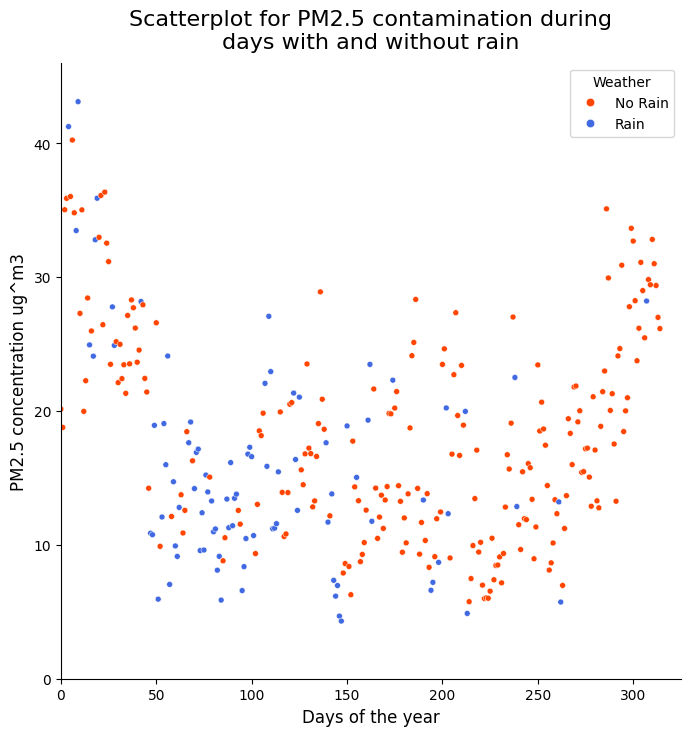

In [64]:
palette = {"Rain": 'royalblue', "No Rain": 'orangered'}

plt.figure(figsize=(8,8))
scatterplot = sns.scatterplot(data=df_subset, x=range(df.shape[0]), y=df["PM2.5"], hue="Weather", palette=palette, size=1, legend='full')
sns.despine()

handles, labels = scatterplot.get_legend_handles_labels()
legend = plt.legend(handles=handles[:-1], labels=labels[:-1], title='Weather', loc='upper right')
legend.get_title().set_fontsize('10')  


plt.title("Scatterplot for PM2.5 contamination during\ndays with and without rain", fontsize=16, y=1.01)
plt.xlabel("Days of the year", fontsize=12)
plt.ylabel("PM2.5 concentration ug^m3", fontsize=12)
plt.ylim(0, 46)
plt.xlim(0, 325)
plt.show()

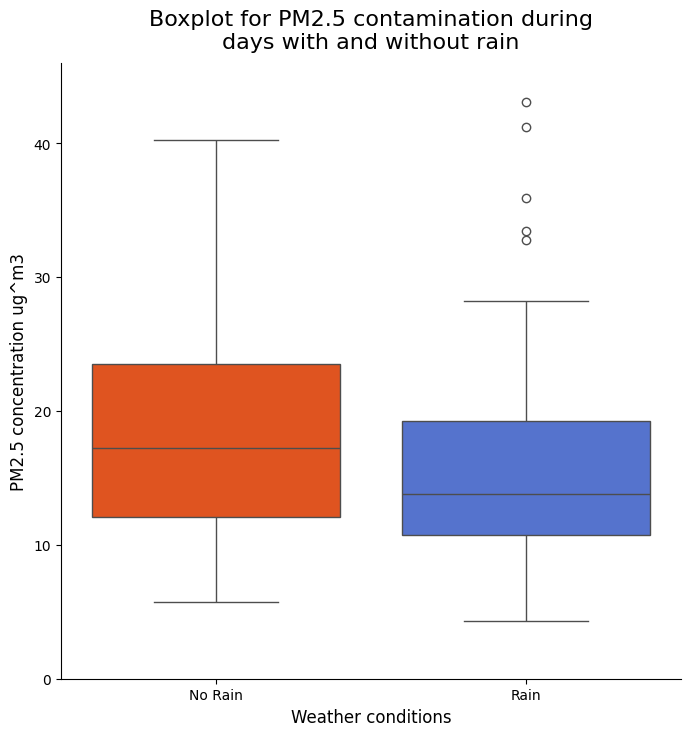

In [65]:
palette = {"Rain": 'royalblue', "No Rain": 'orangered'}

plt.figure(figsize=(8,8))
boxplot = sns.boxplot(data=df_subset, x="Weather", y="PM2.5", hue = "Weather", palette=palette, legend=False)
sns.despine()

plt.title("Boxplot for PM2.5 contamination during\ndays with and without rain", fontsize=16, y=1.01)
plt.xlabel("Weather conditions", fontsize=12)
plt.ylabel("PM2.5 concentration ug^m3", fontsize=12)
plt.ylim(0, 46)
plt.show()

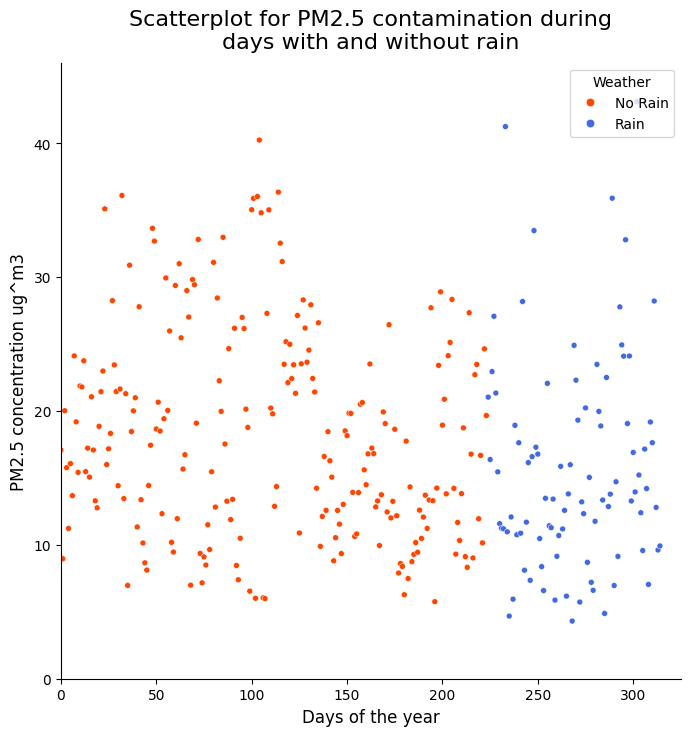

In [67]:
df_subset = df_subset.sort_values(by="Weather", axis=0)
palette = {"Rain": 'royalblue', "No Rain": 'orangered'}

plt.figure(figsize=(8,8))
scatterplot = sns.scatterplot(data=df_subset, x=range(df.shape[0]), y="PM2.5", hue="Weather", palette=palette, size=1.5, legend='full')
sns.despine()

handles, labels = scatterplot.get_legend_handles_labels()
legend = plt.legend(handles=handles[:-1], labels=labels[:-1], title='Weather', loc='upper right')
legend.get_title().set_fontsize('10')  


plt.title("Scatterplot for PM2.5 contamination during\ndays with and without rain", fontsize=16, y=1.01)
plt.xlabel("Days of the year", fontsize=12)
plt.ylabel("PM2.5 concentration ug^m3", fontsize=12)
plt.ylim(0, 46)
plt.xlim(0, 325)
plt.show()